In [1]:
import pandas as pd

In [2]:
df = pd.read_csv

In [5]:
df = pd.read_csv('Spotify Quarterly.csv', parse_dates=['Date'], dayfirst=True)

In [6]:
df = pd.read_csv('Spotify Quarterly.csv', parse_dates=['Date'], date_format='%d-%m-%Y')

In [8]:
print(df.dtypes)

Date                             datetime64[ns]
Total Revenue                           float64
Cost of Revenue                         float64
Gross Profit                            float64
Premium Revenue                         float64
Premium Cost Revenue                    float64
Premium Gross Profit                    float64
Ad Revenue                              float64
Ad Cost of revenue                      float64
Ad gross Profit                         float64
MAUs                                    float64
Premium MAUs                            float64
Ad MAUs                                 float64
Premium ARPU                            float64
Sales and Marketing Cost                float64
Research and Development Cost           float64
Genreal and Adminstraive Cost           float64
dtype: object


In [10]:
# Fungsi untuk mengubah nama kolom menjadi camel_case
def to_camel_case(column):
    return column.strip().lower().replace(" ", "_")

In [11]:
# Mengubah nama kolom
df.columns = [to_camel_case(col) for col in df.columns]

In [13]:
# Menampilkan nama kolom baru
print(df.columns)

Index(['date', 'total_revenue', 'cost_of_revenue', 'gross_profit',
       'premium_revenue', 'premium_cost_revenue', 'premium_gross_profit',
       'ad_revenue', 'ad_cost_of_revenue', 'ad_gross_profit', 'maus',
       'premium_maus', 'ad_maus', 'premium_arpu', 'sales_and_marketing_cost',
       'research_and_development_cost', 'genreal_and_adminstraive_cost'],
      dtype='object')


In [14]:
# Mengecek missing values
print(df.isnull().sum())

date                             0
total_revenue                    1
cost_of_revenue                  1
gross_profit                     1
premium_revenue                  1
premium_cost_revenue             1
premium_gross_profit             1
ad_revenue                       1
ad_cost_of_revenue               1
ad_gross_profit                  1
maus                             1
premium_maus                     1
ad_maus                          1
premium_arpu                     0
sales_and_marketing_cost         1
research_and_development_cost    1
genreal_and_adminstraive_cost    1
dtype: int64


In [22]:
# Mengisi missing value dengan metode forward fill
# df.fillna(method='ffill', inplace=True)
# ga bisa harus versi baru
df.ffill(inplace=True)


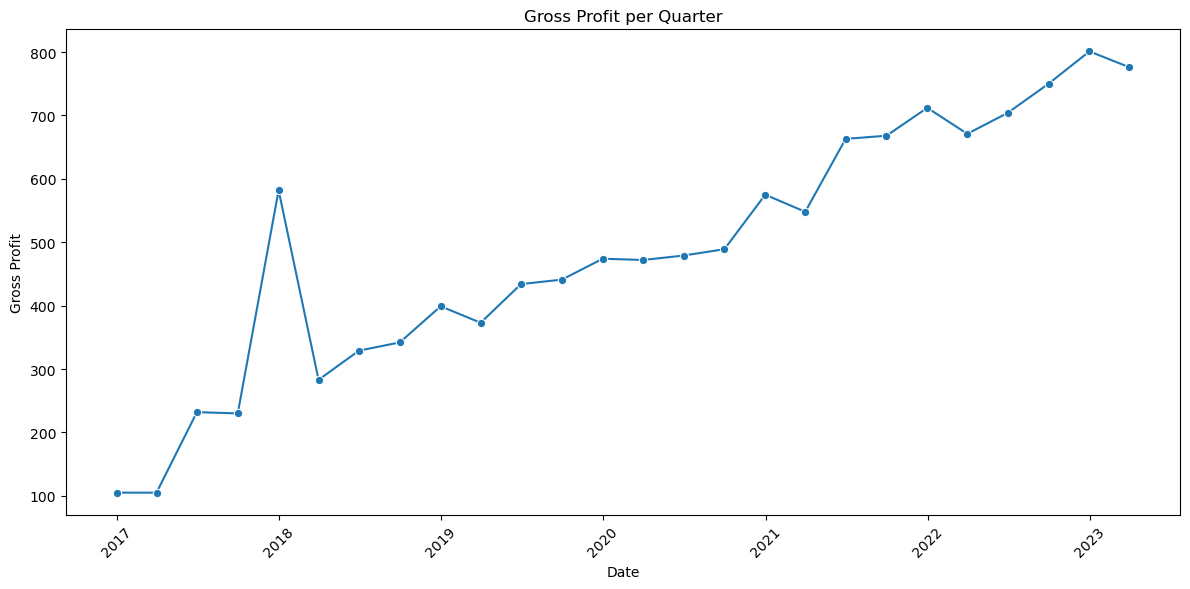

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Gross Profit
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='gross_profit', marker='o')
plt.title('Gross Profit per Quarter')
plt.xlabel('Date')
plt.ylabel('Gross Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


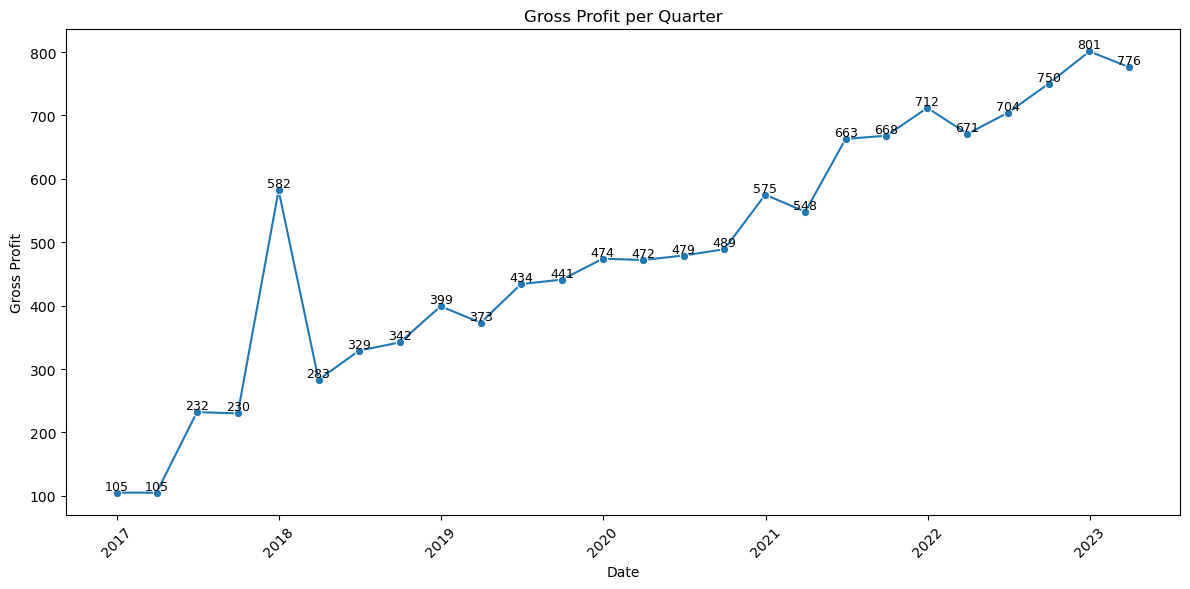

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Gross Profit
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='gross_profit', marker='o')

# Tambahkan label angka di tiap titik
data_points = df[['date', 'gross_profit']]
for i in range(len(data_points)):
    plt.text(x=data_points['date'].iloc[i],
             y=data_points['gross_profit'].iloc[i],
             s=f"{data_points['gross_profit'].iloc[i]:,.0f}",
             fontsize=9,
             ha='center',
             va='bottom')

plt.title('Gross Profit per Quarter')
plt.xlabel('Date')
plt.ylabel('Gross Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

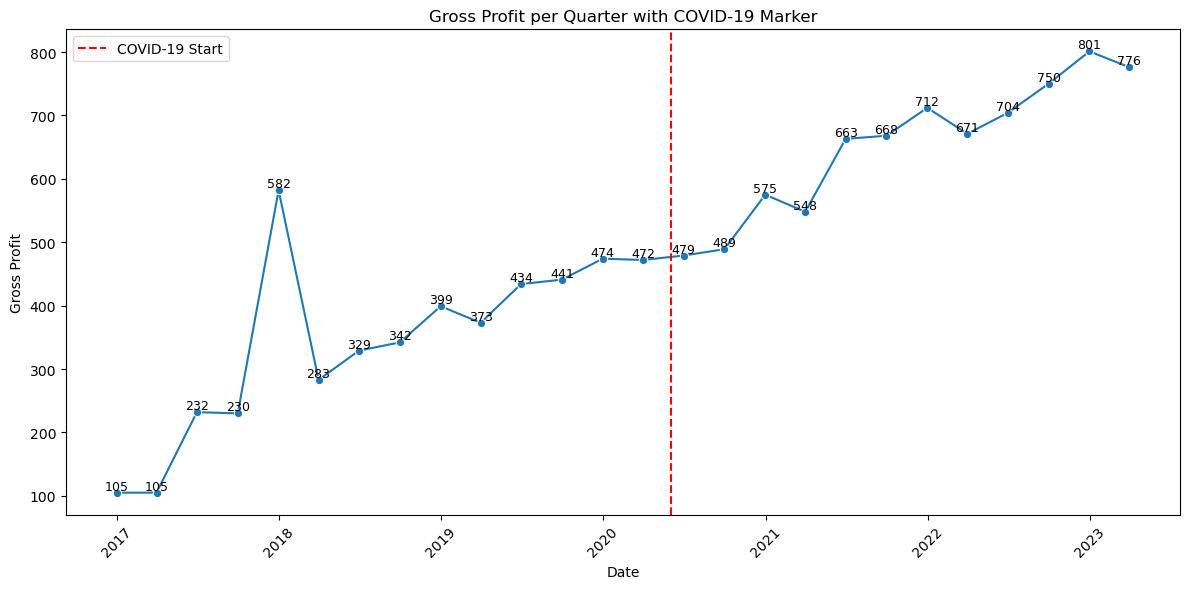

In [27]:
# Visualisasi dengan penanda COVID-19
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='gross_profit', marker='o')

#tambahan label angka di tiap titik
ata_points = df[['date', 'gross_profit']]
for i in range(len(data_points)):
    plt.text(x=data_points['date'].iloc[i],
             y=data_points['gross_profit'].iloc[i],
             s=f"{data_points['gross_profit'].iloc[i]:,.0f}",
             fontsize=9,
             ha='center',
             va='bottom')

plt.axvline(pd.to_datetime('2020-06-01'), color='red', linestyle='--', label='COVID-19 Start')
plt.title('Gross Profit per Quarter with COVID-19 Marker')
plt.xlabel('Date')
plt.ylabel('Gross Profit')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




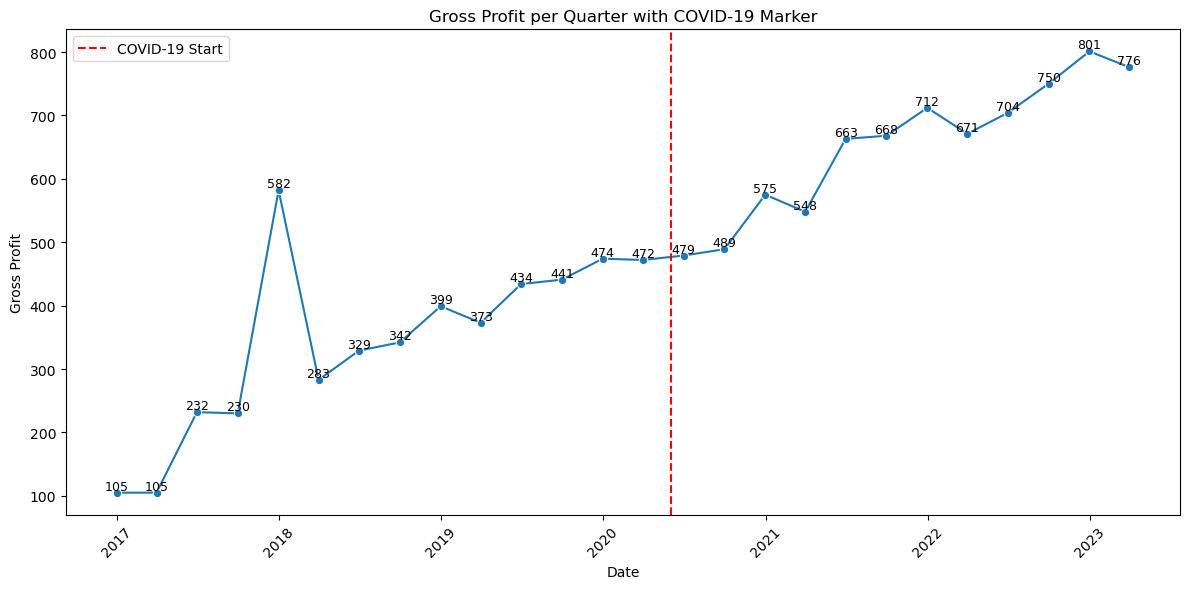

In [28]:
# Visualisasi dengan penanda COVID-19
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='gross_profit', marker='o')

#tambahan label angka di tiap titik
ata_points = df[['date', 'gross_profit']]
for i in range(len(data_points)):
    plt.text(x=data_points['date'].iloc[i],
             y=data_points['gross_profit'].iloc[i],
             s=f"{data_points['gross_profit'].iloc[i]:,.0f}",
             fontsize=9,
             ha='center',
             va='bottom')

plt.axvline(pd.to_datetime('2020-06-01'), color='red', linestyle='--', label='COVID-19 Start')
plt.title('Gross Profit per Quarter with COVID-19 Marker')
plt.xlabel('Date')
plt.ylabel('Gross Profit')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


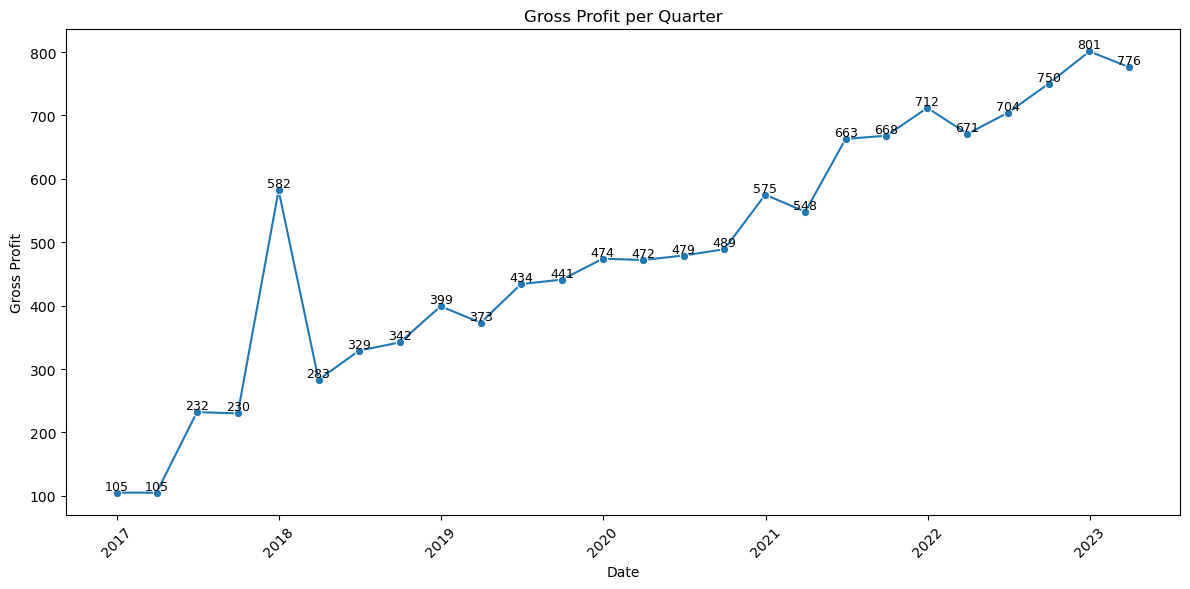

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Visualisasi Gross Profit
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='date', y='gross_profit', marker='o')

# Tambahkan label angka di tiap titik
data_points = df[['date', 'gross_profit']]
for i in range(len(data_points)):
    plt.text(x=data_points['date'].iloc[i],
             y=data_points['gross_profit'].iloc[i],
             s=f"{data_points['gross_profit'].iloc[i]:,.0f}",
             fontsize=9,
             ha='center',
             va='bottom')

# Format sumbu waktu agar tampil per tahun atau per kuartal
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # tampil per tahun
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))  # hanya tampilkan tahun

plt.title('Gross Profit per Quarter')
plt.xlabel('Date')
plt.ylabel('Gross Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


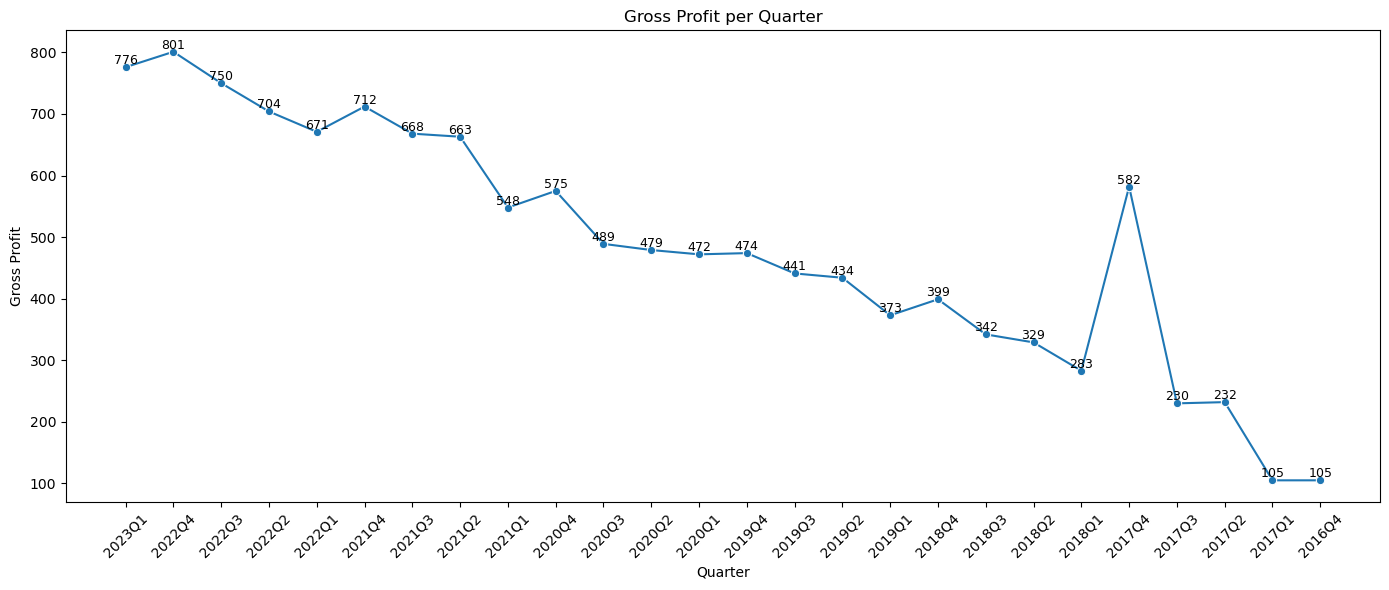

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tambahkan kolom label kuartal (e.g., '2017-Q1')
df['quarter_label'] = df['date'].dt.to_period('Q').astype(str)

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='quarter_label', y='gross_profit', marker='o')

# Tambahkan angka di atas titik
for i in range(len(df)):
    plt.text(x=i,
             y=df['gross_profit'].iloc[i],
             s=f"{df['gross_profit'].iloc[i]:,.0f}",
             fontsize=9,
             ha='center',
             va='bottom')

plt.title('Gross Profit per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Gross Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


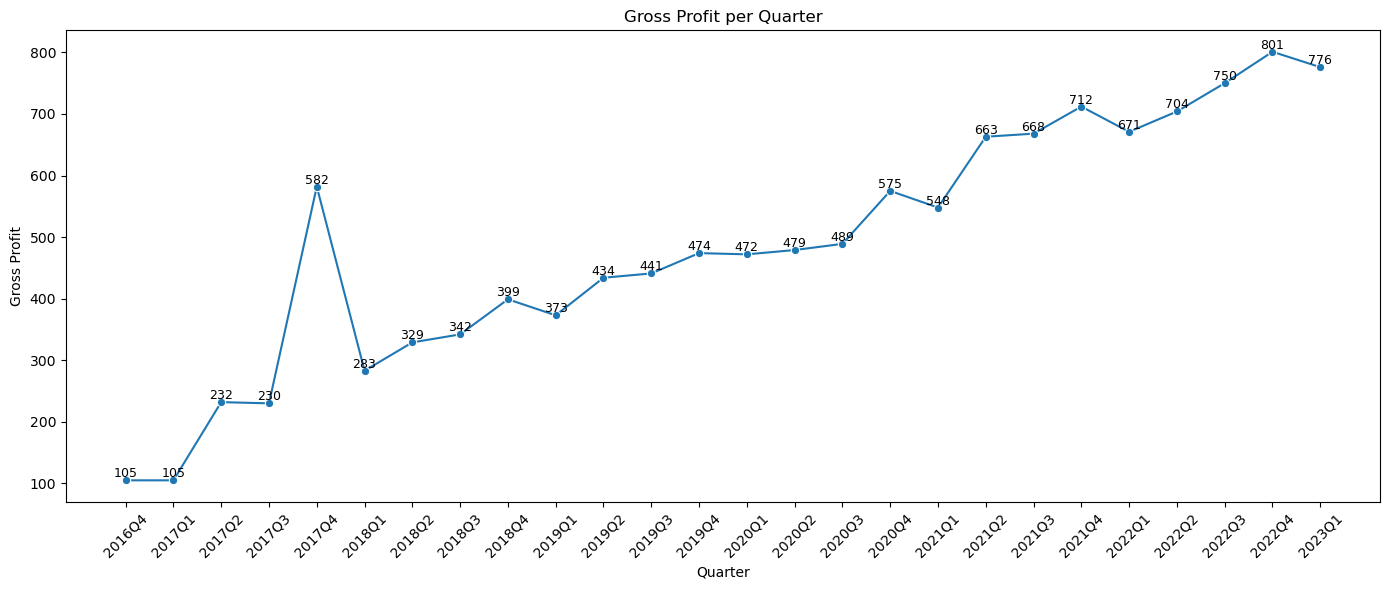

In [32]:
# Urutkan berdasarkan tanggal terlebih dahulu
df = df.sort_values(by='date')

# Tambahkan kolom kuartal
df['quarter_label'] = df['date'].dt.to_period('Q').astype(str)

# Buat plot
plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='quarter_label', y='gross_profit', marker='o')

# Tambahkan angka
for i in range(len(df)):
    plt.text(x=i,
             y=df['gross_profit'].iloc[i],
             s=f"{df['gross_profit'].iloc[i]:,.0f}",
             fontsize=9,
             ha='center',
             va='bottom')

plt.title('Gross Profit per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Gross Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


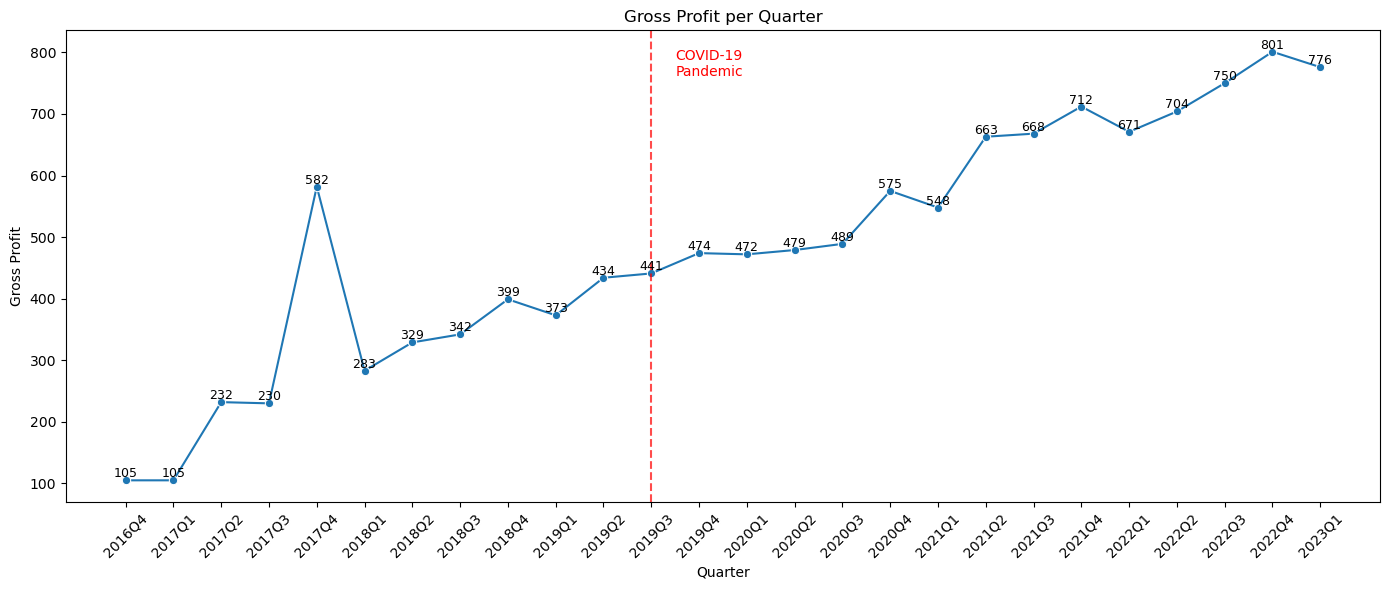

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Urutkan berdasarkan tanggal
df = df.sort_values(by='date')

# Tambahkan kolom kuartal
df['quarter_label'] = df['date'].dt.to_period('Q').astype(str)

plt.figure(figsize=(14,6))
sns.lineplot(data=df, x='quarter_label', y='gross_profit', marker='o')

# Tambahkan angka di atas titik
for i in range(len(df)):
    plt.text(x=i,
             y=df['gross_profit'].iloc[i],
             s=f"{df['gross_profit'].iloc[i]:,.0f}",
             fontsize=9,
             ha='center',
             va='bottom')

# Tambahkan garis vertikal untuk pandemi (Q2 2020)
covid_q = df[df['quarter_label'] == '2020Q2'].index[0]
plt.axvline(x=covid_q, color='red', linestyle='--', alpha=0.7)
plt.text(x=covid_q + 0.5,
         y=max(df['gross_profit']) * 0.95,
         s='COVID-19\nPandemic',
         color='red',
         fontsize=10,
         ha='left')

plt.title('Gross Profit per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Gross Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


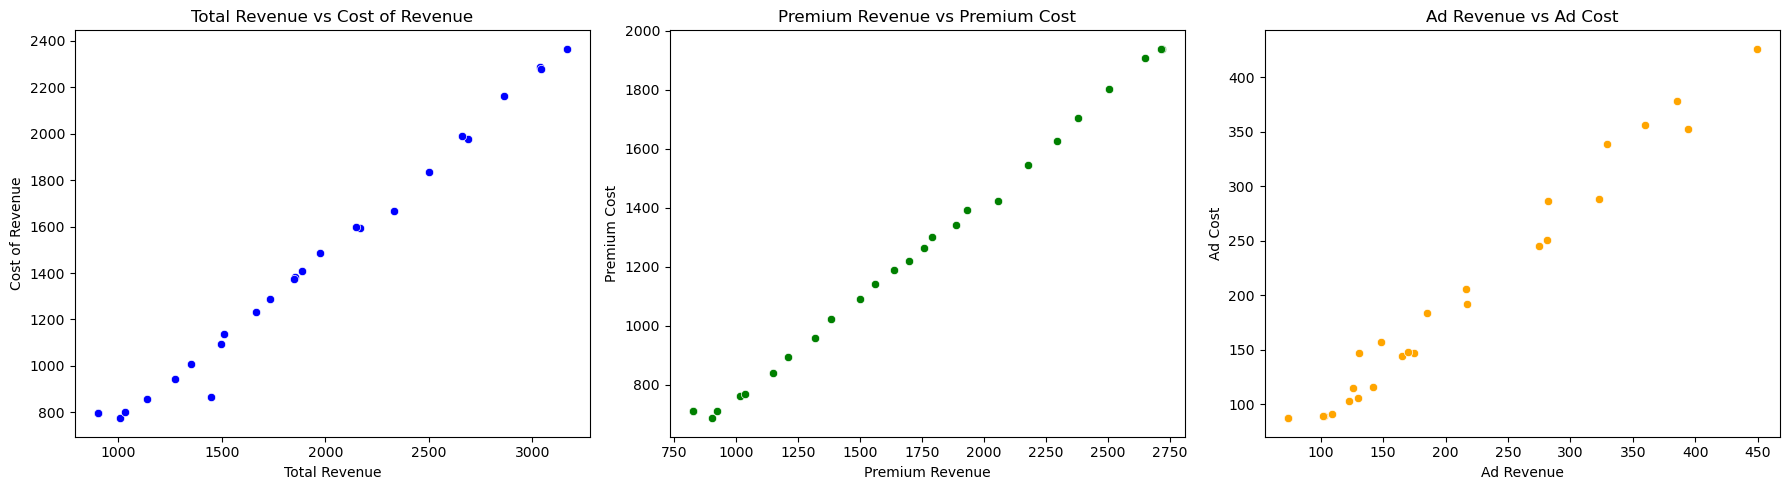

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 5))

# Plot 1: Total Revenue vs Cost of Revenue
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='total_revenue', y='cost_of_revenue', color='blue')
plt.title('Total Revenue vs Cost of Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Cost of Revenue')

# Plot 2: Premium Revenue vs Premium Cost Revenue
plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='premium_revenue', y='premium_cost_revenue', color='green')
plt.title('Premium Revenue vs Premium Cost')
plt.xlabel('Premium Revenue')
plt.ylabel('Premium Cost')

# Plot 3: Ad Revenue vs Ad Cost of Revenue
plt.subplot(1, 3, 3)
sns.scatterplot(data=df, x='ad_revenue', y='ad_cost_of_revenue', color='orange')
plt.title('Ad Revenue vs Ad Cost')
plt.xlabel('Ad Revenue')
plt.ylabel('Ad Cost')

plt.tight_layout()
plt.show()
